In [11]:
from datasets import Dataset
import ast
import pandas as pd

In [12]:
data = pd.read_csv("big5_training_data_with_token_roberta.csv")

In [14]:
data.head()

,message_id,message,ope_z_level,con_z_level,ext_z_level,agr_z_level,neu_z_level,message_tokens
0,tweet_143508,""";;tengo mi penchi fierron up in the air & its hella too big 12 inches """"like daaamn!!;;""",0.4,0.6,0.6,0.6,0.4,"[0, 113, 48640, 3869, 2977, 11163, 7670, 7930, 856, 906, 2839, 62, 11, 5, 935, 359, 63, 7105, 102, 350, 380, 316, 4877, 41039, 3341, 385, 6621, 40060, 12846, 48640, 113, 2]"
1,tweet_425070,"perhaps he loved everyone but me. nbut that makes me special, doesn't it?",0.6,0.6,0.4,0.6,0.6,"[0, 35982, 37, 2638, 961, 53, 162, 4, 295, 4297, 14, 817, 162, 780, 6, 630, 75, 24, 116, 2]"
2,tweet_502775,"if you have 3 coffee cups in your car, you have a caffeine addiction. i have more than 5.",0.6,0.6,0.6,0.6,0.4,"[0, 1594, 47, 33, 155, 3895, 12988, 11, 110, 512, 6, 47, 33, 10, 26604, 7530, 4, 939, 33, 55, 87, 195, 4, 2]"
3,tweet_600640,i'm too sleepy to start work in an hour,0.4,0.8,0.2,0.6,0.6,"[0, 118, 437, 350, 33782, 7, 386, 173, 11, 41, 1946, 2]"
4,blog_79108,"i worked for a recruiter a little bit after i graduated from university.it was a friend of my cousin's, whom i had moved in with to escape colorado, and he really needed help with his website and internal network.",0.8,0.6,0.4,0.6,0.8,"[0, 118, 1006, 13, 10, 36425, 8660, 10, 410, 828, 71, 939, 8505, 31, 2737, 4, 405, 21, 10, 1441, 9, 127, 11204, 18, 6, 2661, 939, 56, 1410, 11, 19, 7, 5111, 3195, 2102, 6, 8, 37, 269, 956, 244, 19, 39, 998, 8, 3425, 1546, 4, 2]"


In [8]:
pd.set_option('display.max_colwidth', None)

# 然后打印你需要的数据
print(data[data['message_id'] == 'blog_178310']['message'])

846302    sometimes my in-laws do things that are totally incomprehensible to me.two things happened tonight that - while i can see the reason behind them - still just blow my mind.
Name: message, dtype: object


In [4]:
model_inputs = tokenizer(examples['message'], max_length=512, truncation=True, padding="max_length")

NameError: name 'tokenizer' is not defined

In [ ]:
data['message_tokens'].apply(len).describe()

count    807530.000000
mean        201.574602
std         235.330904
min           8.000000
25%          86.000000
50%         167.000000
75%         255.000000
max       60549.000000
Name: message_tokens, dtype: float64

In [12]:
def preprocess_function(examples):
    # 假设输入已经是整数列表的形式,如果是字符串形式需要先转换
    # if isinstance(examples['message_tokens'][0], str):
    #     input_ids = [ast.literal_eval(tokens) for tokens in examples['message_tokens']]
    # else:
    input_ids = examples['message_tokens']
    
    # 确保所有序列长度一致
    max_length = 512  # 设定一个最大长度
    input_ids = [tokens[:max_length] + [0] * (max_length - len(tokens)) for tokens in input_ids]

    labels = {}
    for col in ['ope_z', 'con_z', 'ext_z', 'agr_z', 'neu_z']:
        labels[col] = examples[col]

    return {'input_ids': input_ids, 'labels': labels}

In [13]:
dataset = Dataset.from_pandas(data)
dataset = dataset.map(preprocess_function, remove_columns=dataset.column_names)
train_dataset, val_dataset = dataset.train_test_split(test_size=0.1).values()


Map:   0%|          | 0/807530 [00:00<?, ? examples/s]


TypeError: can only concatenate str (not "list") to str

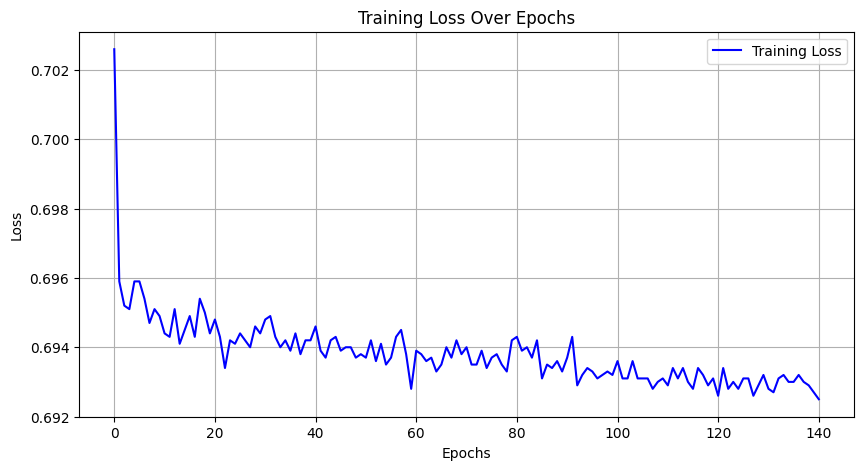

In [10]:
import matplotlib.pyplot as plt
loss_values = [
    0.7026, 0.6959, 0.6952, 0.6951, 0.6959, 0.6959, 0.6954, 0.6947, 0.6951, 0.6949, 0.6944,
    0.6943, 0.6951, 0.6941, 0.6945, 0.6949, 0.6943, 0.6954, 0.695, 0.6944, 0.6948, 0.6943,
    0.6934, 0.6942, 0.6941, 0.6944, 0.6942, 0.694, 0.6946, 0.6944, 0.6948, 0.6949, 0.6943,
    0.694, 0.6942, 0.6939, 0.6944, 0.6938, 0.6942, 0.6942, 0.6946, 0.6939, 0.6937, 0.6942,
    0.6943, 0.6939, 0.694, 0.694, 0.6937, 0.6938, 0.6937, 0.6942, 0.6936, 0.6941, 0.6935,
    0.6937, 0.6943, 0.6945, 0.6938, 0.6928, 0.6939, 0.6938, 0.6936, 0.6937, 0.6933, 0.6935,
    0.694, 0.6937, 0.6942, 0.6938, 0.694, 0.6935, 0.6935, 0.6939, 0.6934, 0.6937, 0.6938,
    0.6935, 0.6933, 0.6942, 0.6943, 0.6939, 0.694, 0.6937, 0.6942, 0.6931, 0.6935, 0.6934,
    0.6936, 0.6933, 0.6937, 0.6943, 0.6929, 0.6932, 0.6934, 0.6933, 0.6931, 0.6932, 0.6933,
    0.6932, 0.6936, 0.6931, 0.6931, 0.6936, 0.6931, 0.6931, 0.6931, 0.6928, 0.693, 0.6931,
    0.6929, 0.6934, 0.6931, 0.6934, 0.693, 0.6928, 0.6934, 0.6932, 0.6929, 0.6931, 0.6926,
    0.6934, 0.6928, 0.693, 0.6928, 0.6931, 0.6931, 0.6926, 0.6929, 0.6932, 0.6928, 0.6927,
    0.6931, 0.6932, 0.693, 0.693, 0.6932, 0.693, 0.6929, 0.6927, 0.6925
]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(loss_values, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()